In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
from paretoset import paretoset

import model_functions as fmodel

# Matrix ISA Model Example Usage

### Number of Registers to Hide Memory Latency

using larger memories with higher latency requires more matrix registers to acheive high utilization. below is a plot showing how utilization is affected by memory latency for different matrix register counts.

100%|██████████| 100/100 [00:00<00:00, 1949.62it/s]


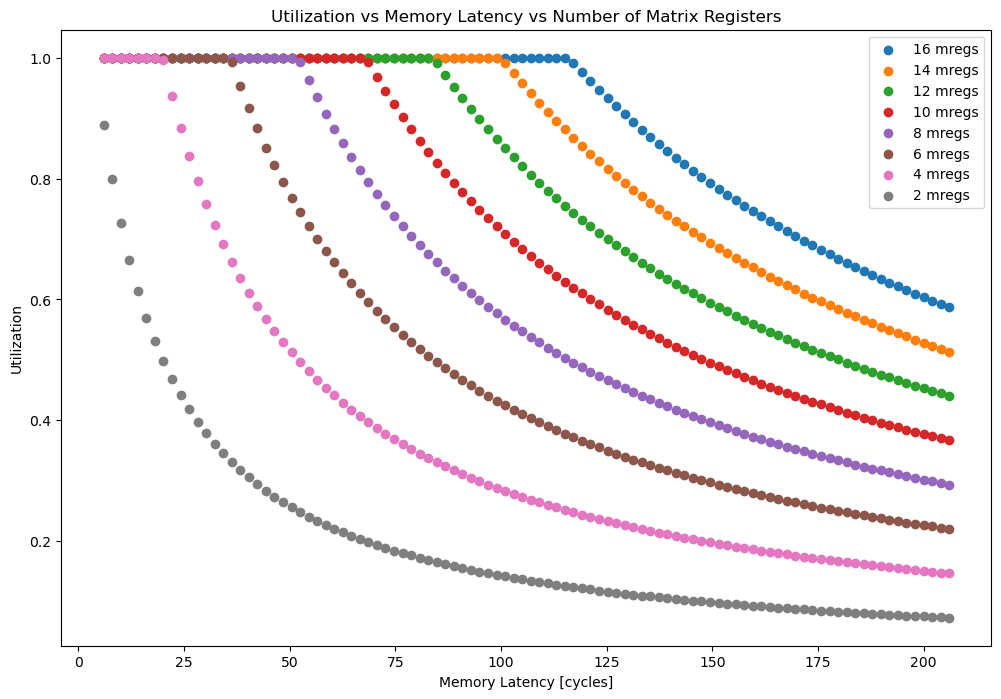

In [34]:
fig, axs = plt.subplots(figsize=(12,8))
axs.set_title('Utilization vs Memory Latency vs Number of Matrix Registers')
axs.set_xlabel('Memory Latency [cycles]')
axs.set_ylabel('Utilization')

level = 1
databits = np.array([64])
slice_values = np.linspace(6, 206, 100)
num_mregs = np.array(range(16, 0, -2))
for n in num_mregs:
    perf_model = fmodel.init_pm(databits, t_mem=slice_values, num_mregs=np.array([n]))

    x = perf_model.index.levels[level]
    y = perf_model['util']
    scatter = axs.scatter(x, y, label=f'{n} mregs')
    axs.legend()

100%|██████████| 100/100 [00:00<00:00, 1280.06it/s]
/var/folders/wv/zgwd_vy53f31jd6y1jvhjk600000gp/T/ipykernel_54884/3965360772.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = axs.scatter(x, y, cmap='viridis', s=100)


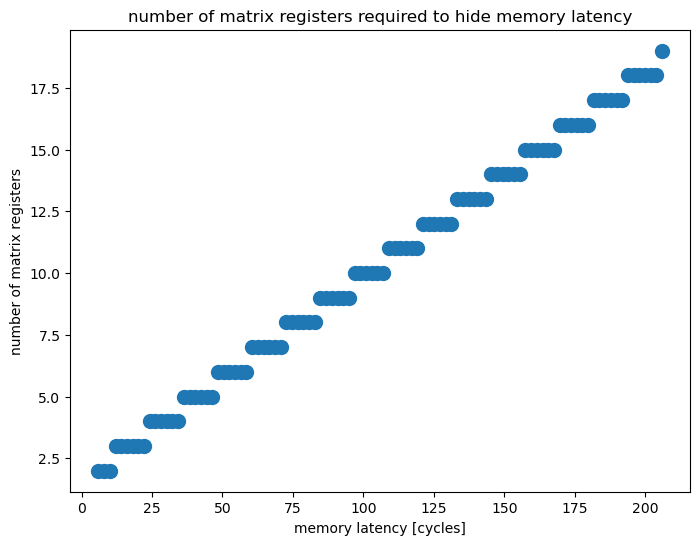

In [35]:
level = 1
slice_values = np.linspace(6,206,100)
perf_model = fmodel.init_pm(t_mem=slice_values)

fig, axs = plt.subplots(figsize=(8,6))
axs.set_title('number of matrix registers required to hide memory latency')
axs.set_xlabel('memory latency [cycles]')
axs.set_ylabel('number of matrix registers')

x = perf_model.index.levels[level]
y = perf_model['max_mregs']
scatter = axs.scatter(x, y, cmap='viridis', s=100)

100%|██████████| 100/100 [00:00<00:00, 1671.60it/s]


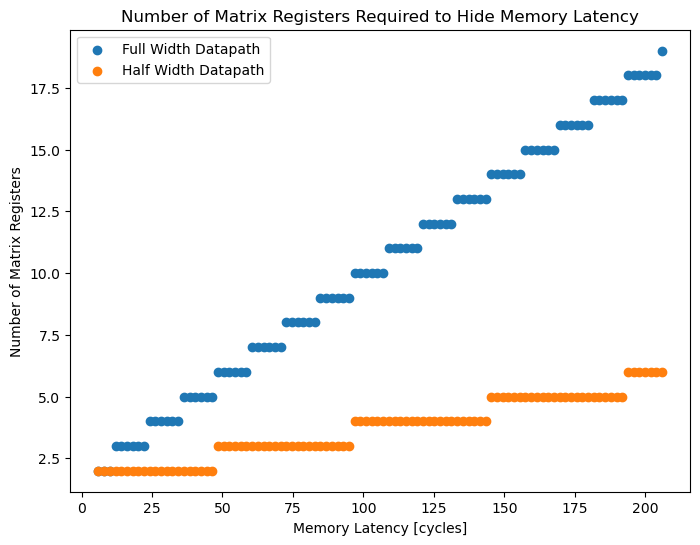

In [36]:
fig, axs = plt.subplots(figsize=(8,6))
axs.set_title('Number of Matrix Registers Required to Hide Memory Latency')
axs.set_xlabel('Memory Latency [cycles]')
axs.set_ylabel('Number of Matrix Registers')
scatter = axs.scatter(x, y, label='Full Width Datapath')

level = 1
slice_values = np.linspace(6,206,100)
perf_model = fmodel.init_pm(t_mem=slice_values,width_mmu=np.array([0.5]))

x = perf_model.index.levels[level]
y = perf_model['max_mregs']
scatter = axs.scatter(x, y, label='Half Width Datapath')
axs.legend()

### Exploring Design Space

The model can be used to sweep ranges of the input parameters, and the output performance specs can be visualized using pareto-optimal curves.

With these plots we can visualize the tradeoffs between ngates capacity, memory bandwidth, and performance (operations per cycle).

100%|██████████| 936/936 [00:00<00:00, 1948.49it/s]


t_uk  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op width_mmu         
64       20    16 16 16 256      1  16.0 16.0 2         0    1          60.0   
                                              4         0    1          60.0   
                                         20.0 4         0    1          61.0   
                                         24.0 4         0    1          62.0   
                                         28.0 4         0    1          63.0   
                                         32.0 4         0    1          64.0   
                                         44.0 4         0    1          67.0   
                                              6         0    1          67.0   
                                         64.0 4         0    1          72.0   
                                              6         0    1          72.0   
                                    32.0 20.0 4         0    1          61.0   
                                         28.0 4         0    1          63.0   
                                         32.0 4         0    1          64.0   
                                         44.0 4         0    1          67.0   
                                              6         0    1          67.0   
                                         64.0 4         0    1          72.0   
                                              6         0    1          72.0   

                                                                            util  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op width_mmu             
64       20    16 16 16 256      1  16.0 16.0 2         0    1          0.533333   
                                              4         0    1          1.000000   
                                         20.0 4         0    1          0.914286   
                                         24.0 4         0    1          0.888889   
                                         28.0 4         0    1          0.914286   
                                         32.0 4         0    1          1.000000   
                                         44.0 4         0    1          0.926278   
                                              6         0    1          0.969697   
                                         64.0 4         0    1          0.888889   
                                              6         0    1          1.000000   
                                    32.0 20.0 4         0    1          0.914286   
                                         28.0 4         0    1          0.914286   
                                         32.0 4         0    1          1.000000   
                                         44.0 4         0    1          0.926278   
                                              6         0    1          0.969697   
                                         64.0 4         0    1          0.888889   
                                              6         0    1          1.000000   

                                                                         ops_cycle  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op width_mmu               
64       20    16 16 16 256      1  16.0 16.0 2         0    1           17.066667   
                                              4         0    1           32.000000   
                                         20.0 4         0    1           36.571429   
                                         24.0 4         0    1           42.666667   
                                         28.0 4         0    1           51.200000   
                                         32.0 4         0    1           64.000000   
                                         44.0 4         0    1           81.512438   
                                              6         0    1           85.333333   
                                         64.0 4         0    1          113.777778   
        

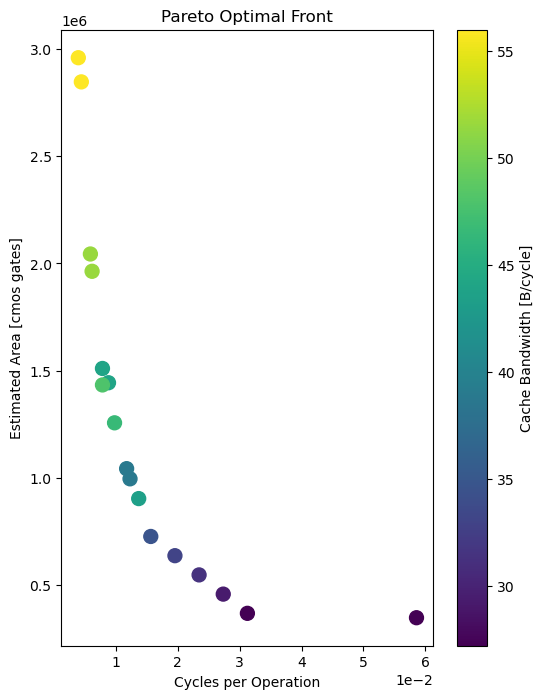

In [37]:
perf_model = fmodel.init_pm(
    databits=np.array([64]),
    t_mem = np.array([20]),
    l2_cache = np.array([256]),
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    num_mregs = np.array(range(2,18,2)),
    t_op = np.array([0, 1, 2]),
    width_mmu = np.array([1])
)
perf_model = perf_model[perf_model['max_mem_bw'] <= 64]
# perf_model = perf_model[perf_model['opu_gates'] <= 64]

pm_pareto = perf_model[['ops_cycle','opu_gates', 'max_mem_bw']]
mask = paretoset(pm_pareto, sense=['max', 'min', 'min'])

bw = perf_model.loc[mask,'max_mem_bw']
ngates = perf_model.loc[mask,'opu_gates']
opc = perf_model.loc[mask,'ops_cycle']

fig, axs = plt.subplots(1,figsize=(6,8))
axs.set_title('Pareto Optimal Front')
axs.set_xlabel('Cycles per Operation')
axs.set_ylabel('Estimated Area [cmos gates]')

scatter = axs.scatter(1/opc, ngates, c=bw, cmap='viridis', s=100)
axs.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
fig.colorbar(scatter, ax=axs, label='Cache Bandwidth [B/cycle]')
perf_model[mask]

#### Memory Data Reuse
If the matrices are sufficiently large to reuse tiles, then bandwidth can be decreased:

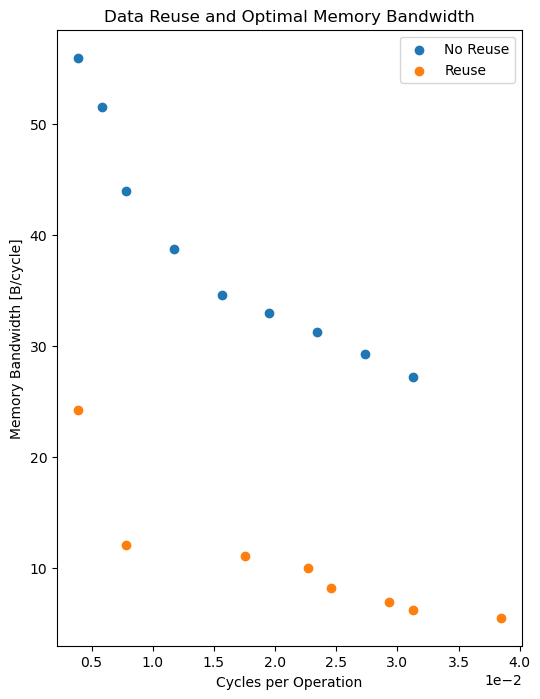

In [38]:
no_reuse_pm = perf_model.copy()
pm_pareto = no_reuse_pm[['ops_cycle','max_mem_bw']]
mask = paretoset(pm_pareto, sense=['max', 'min'])

bw = no_reuse_pm.loc[mask,'max_mem_bw']
opc = no_reuse_pm.loc[mask,'ops_cycle']

fig, axs = plt.subplots(1,figsize=(6,8))
scatter = axs.scatter(1/opc, bw, label='No Reuse')

reuse_perf_model = perf_model.copy()
reuse_perf_model = reuse_perf_model[reuse_perf_model['mem_bw'] <= 64]
reuse_perf_model = reuse_perf_model[reuse_perf_model['ops_cycle'] >= 1/(4e-2)]

pm_pareto = reuse_perf_model[['ops_cycle','mem_bw']]
reuse_mask = paretoset(pm_pareto, sense=['max', 'min'])

bw = reuse_perf_model.loc[reuse_mask,'mem_bw']
opc = reuse_perf_model.loc[reuse_mask,'ops_cycle']

scatter = axs.scatter(1/opc, bw, label='Reuse')
axs.set_title('Data Reuse and Optimal Memory Bandwidth')
axs.set_xlabel('Cycles per Operation')
axs.set_ylabel('Memory Bandwidth [B/cycle]')
axs.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs.legend()


100%|██████████| 936/936 [00:00<00:00, 1867.46it/s]


t_uk  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op width_mmu          
64       200   16 16 16 256      1  16.0 16.0 10        0    1          420.0   
                                              12        0    1          420.0   
                                              14        0    1          420.0   
                                              16        0    1          420.0   
                                         20.0 16        0    1          421.0   
                                         24.0 14        0    1          422.0   
                                              16        0    1          422.0   
                                         28.0 14        0    1          423.0   
                                              16        0    1          423.0   
                                         44.0 14        0    1          427.0   
                                              16        0    1          427.0   
                                    32.0 16.0 14        0    1          420.0   
                                              16        0    1          420.0   
                                         20.0 16        0    1          421.0   
                                         24.0 16        0    1          422.0   
                                         28.0 14        0    1          423.0   
                                              16        0    1          423.0   
                                         32.0 14        0    1          424.0   
                                              16        0    1          424.0   
                                         44.0 14        0    1          427.0   
                                              16        0    1          427.0   
                                    64.0 16.0 14        0    1          420.0   
                                              16        0    1          420.0   
                                         20.0 16        0    1          421.0   
                                         24.0 16        0    1          422.0   
                                         28.0 14        0    1          423.0   
                                              16        0    1          423.0   

                                                                            util  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op width_mmu             
64       200   16 16 16 256      1  16.0 16.0 10        0    1          0.380952   
                                              12        0    1          0.457143   
                                              14        0    1          0.533333   
                                              16        0    1          0.609524   
                                         20.0 16        0    1          0.555955   
                                         24.0 14        0    1          0.471827   
                                              16        0    1          0.539231   
                                         28.0 14        0    1          0.484161   
                                              16        0    1          0.553327   
                                         44.0 14        0    1          0.508693   
                                              16        0    1          0.581364   
                                    32.0 16.0 14        0    1          0.533333   
                                              16        0    1          0.609524   
                                         20.0 16        0    1          0.555955   
                                         24.0 16        0    1          0.539231   
                                         28.0 14        0    1          0.484161   
                                              16        0    1          0.553327   
                                         32.0 14        0    1          0.528302   
                                           

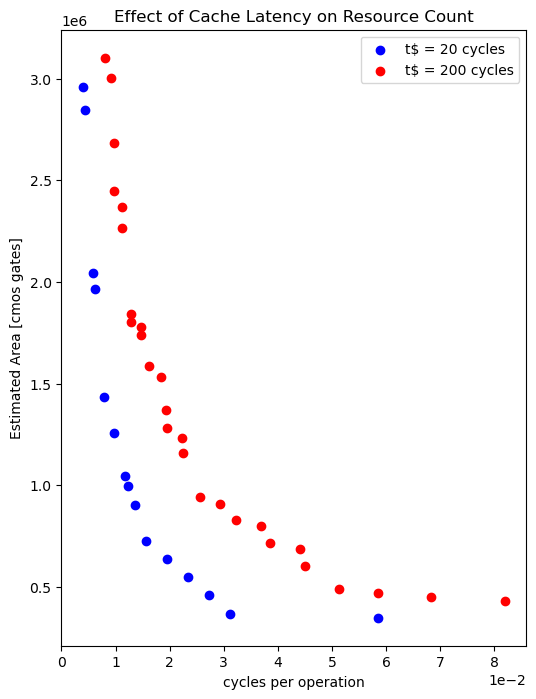

In [69]:
tm20_perf_model = perf_model.copy()
tm200_perf_model = fmodel.init_pm(
    t_mem = np.array([200]),
    l2_cache = np.array([256]),
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    num_mregs = np.array(range(2,18,2)),
    t_op = np.array([0, 1, 2]),
    width_mmu = np.array([1])
)
tm20_perf_model = tm20_perf_model[tm20_perf_model['mem_bw'] <= 64]
tm20_perf_model = tm20_perf_model[tm20_perf_model['opu_gates'] <= 3.2e6]
tm20_perf_model = tm20_perf_model[tm20_perf_model['ops_cycle'] >= 10]

tm200_perf_model = tm200_perf_model[tm200_perf_model['mem_bw'] <= 64]
tm200_perf_model = tm200_perf_model[tm200_perf_model['opu_gates'] <= 3.2e6]
tm200_perf_model = tm200_perf_model[tm200_perf_model['ops_cycle'] >= 10]

tm20_pm_pareto = tm20_perf_model[['ops_cycle','opu_gates']]
tm20_mask = paretoset(tm20_pm_pareto, sense=['max', 'min'])

tm200_pm_pareto = tm200_perf_model[['ops_cycle','opu_gates']]
tm200_mask = paretoset(tm200_pm_pareto, sense=['max', 'min'])

fig, axs = plt.subplots(1,figsize=(6,8))
axs.set_title('Effect of Cache Latency on Resource Count')
axs.set_xlabel('cycles per operation')
axs.set_ylabel('Estimated Area [cmos gates]')

bw = tm20_perf_model.loc[tm20_mask,'mem_bw']
ngates = tm20_perf_model.loc[tm20_mask,'opu_gates']
opc = tm20_perf_model.loc[tm20_mask,'ops_cycle']
scatter = axs.scatter(1/opc, ngates, color='b', label='t$ = 20 cycles')

bw = tm200_perf_model.loc[tm200_mask,'mem_bw']
ngates = tm200_perf_model.loc[tm200_mask,'opu_gates']
opc = tm200_perf_model.loc[tm200_mask,'ops_cycle']
scatter = axs.scatter(1/opc, ngates, color='r', label='t$ = 200 cycles')

axs.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs.legend()
tm200_perf_model[tm200_mask]

We can compare these tradeoffs for half-width and full-width MMU datapaths:

100%|██████████| 936/936 [00:00<00:00, 1870.01it/s]


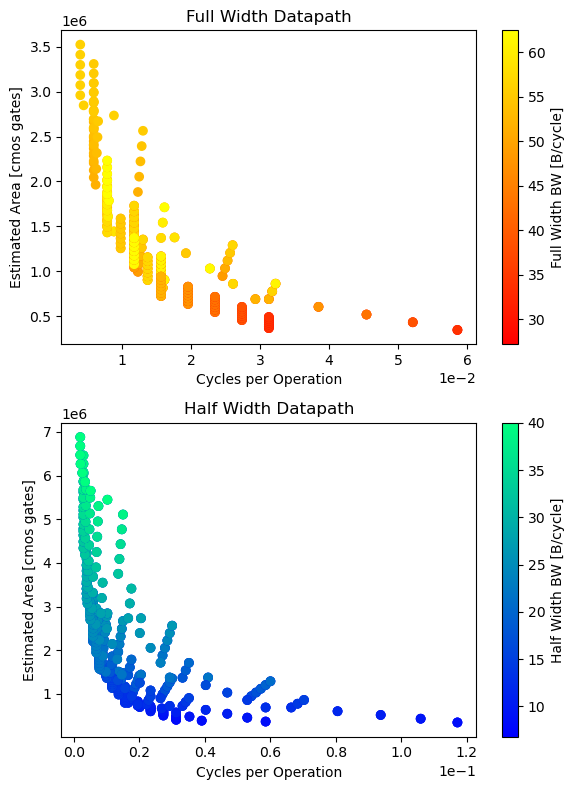

In [40]:
perf_model_t1 = fmodel.init_pm(
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    num_mregs = np.array(range(2,18,2)),
    t_op = np.array([0, 1, 2]),
    width_mmu = np.array([1])
)
perf_model_t4 = fmodel.init_pm(
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    num_mregs = np.array(range(2,18,2)),
    t_op = np.array([0, 1, 2]),
    width_mmu = np.array([0.5])
)
perf_model_t1 = perf_model_t1[perf_model_t1['max_mem_bw'] <= 64]
bw = perf_model_t1['max_mem_bw']
ngates = perf_model_t1['opu_gates']
opc = perf_model_t1['ops_cycle']

perf_model_t4 = perf_model_t4[perf_model_t4['max_mem_bw'] <= 64]
bw_t4 = perf_model_t4['max_mem_bw']
ngates_t4 = perf_model_t4['opu_gates']
opc_t4 = perf_model_t4['ops_cycle']

fig, axs = plt.subplots(2, figsize=(6, 8))
# Plot for full width datapath
axs[0].set_title('Full Width Datapath')
axs[0].set_xlabel('Cycles per Operation')
axs[0].set_ylabel('Estimated Area [cmos gates]')
axs[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
full = axs[0].scatter(1/opc, ngates, c=bw, cmap='autumn', label='full width')
fig.colorbar(full, ax=axs[0], label='Full Width BW [B/cycle]')

# Plot for half width datapath
axs[1].set_title('Half Width Datapath')
axs[1].set_xlabel('Cycles per Operation')
axs[1].set_ylabel('Estimated Area [cmos gates]')
axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
half = axs[1].scatter(1/opc_t4, ngates_t4, c=bw_t4, cmap='winter', label='half width')
fig.colorbar(half, ax=axs[1], label='Half Width BW [B/cycle]')
plt.tight_layout()
plt.show()


100%|██████████| 936/936 [00:00<00:00, 1655.14it/s]


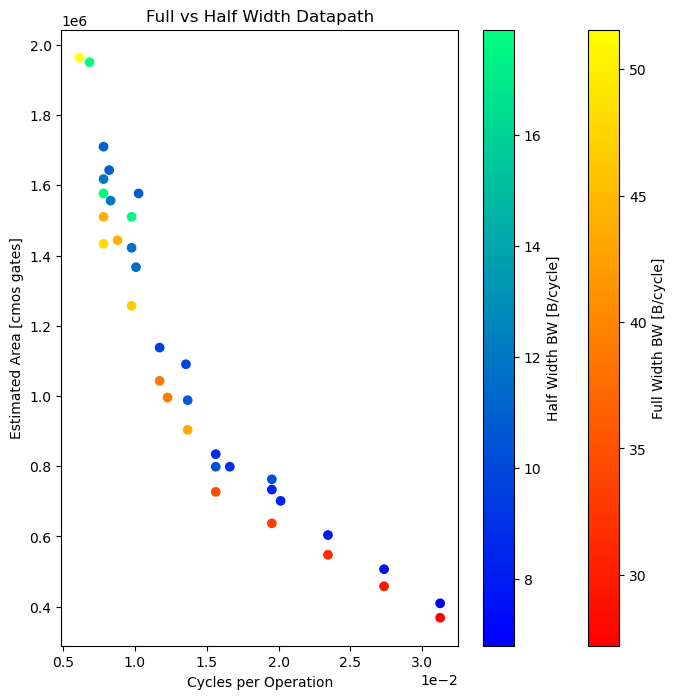

In [65]:
perf_model_t1 = fmodel.init_pm(
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    num_mregs = np.array(range(2,18,2)),
    t_op = np.array([0, 1, 2]),
    width_mmu = np.array([1])
)
perf_model_t4 = fmodel.init_pm(
    mlB = np.array(range(128,513, 32))/8,
    vlB = np.array([128, 256, 512])/8,
    num_mregs = np.array(range(2,18,2)),
    t_op = np.array([0, 1, 2]),
    width_mmu = np.array([0.5])
)
perf_model_t1 = perf_model_t1[perf_model_t1['max_mem_bw'] <= 64]
perf_model_t1 = perf_model_t1[perf_model_t1['opu_gates'] <= 2e6]
perf_model_t1 = perf_model_t1[perf_model_t1['ops_cycle'] >= 1/3.5e-2]

pm_pareto = perf_model_t1[['ops_cycle','opu_gates', 'max_mem_bw']]
mask = paretoset(pm_pareto, sense=['max', 'min', 'min'])

bw = perf_model_t1.loc[mask,'max_mem_bw']
ngates = perf_model_t1.loc[mask,'opu_gates']
opc = perf_model_t1.loc[mask,'ops_cycle']

perf_model_t4 = perf_model_t4[perf_model_t4['max_mem_bw'] <= 64]
perf_model_t4 = perf_model_t4[perf_model_t4['opu_gates'] <= 2e6]
perf_model_t4 = perf_model_t4[perf_model_t4['ops_cycle'] >= 1/3.5e-2]

pm_pareto_t4 = perf_model_t4[['ops_cycle','opu_gates', 'max_mem_bw']]
mask_t4 = paretoset(pm_pareto_t4, sense=['max', 'min', 'min'])

bw_t4 = perf_model_t4.loc[mask_t4,'max_mem_bw']
ngates_t4 = perf_model_t4.loc[mask_t4,'opu_gates']
opc_t4 = perf_model_t4.loc[mask_t4,'ops_cycle']

fig, axs = plt.subplots(1,figsize=(8,8))
axs.set_title('Full vs Half Width Datapath')
axs.set_xlabel('Cycles per Operation')
axs.set_ylabel('Estimated Area [cmos gates]')

full = axs.scatter(1/opc, ngates, c=bw, cmap='autumn', label='full width')
fig.colorbar(full, ax=axs, label = 'Full Width BW [B/cycle]')

half = axs.scatter(1/opc_t4, ngates_t4, c=bw_t4, cmap='winter', label='half width')
fig.colorbar(half, ax=axs, label = 'Half Width BW [B/cycle]')
axs.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


In [63]:
perf_model_t4.loc[mask_t4]

t_uk  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op width_mmu          
64       20    16 16 16 256      1  16.0 16.0 2         0    0.5        120.0   
                                              4         0    0.5        120.0   
                                              6         0    0.5        120.0   
                                              8         0    0.5        120.0   
                                         20.0 8         0    0.5        124.0   
                                         24.0 8         0    0.5        128.0   
                                         28.0 8         0    0.5        132.0   
                                              10        0    0.5        132.0   
                                         32.0 8         0    0.5        136.0   
                                              10        0    0.5        136.0   
                                         44.0 8         0    0.5        148.0   
                                              10        0    0.5        148.0   
                                         64.0 8         0    0.5        168.0   
                                              10        0    0.5        168.0   
                                              12        0    0.5        168.0   
                                    32.0 16.0 6         0    0.5        120.0   
                                              8         0    0.5        120.0   
                                         20.0 8         0    0.5        124.0   
                                         28.0 8         0    0.5        132.0   
                                              10        0    0.5        132.0   
                                         32.0 8         0    0.5        136.0   
                                              10        0    0.5        136.0   
                                    64.0 16.0 6         0    0.5        120.0   
                                              8         0    0.5        120.0   
                                         20.0 8         0    0.5        124.0   

                                                                            util  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op width_mmu             
64       20    16 16 16 256      1  16.0 16.0 2         0    0.5        0.266667   
                                              4         0    0.5        0.533333   
                                              6         0    0.5        0.800000   
                                              8         0    0.5        1.000000   
                                         20.0 8         0    0.5        0.914286   
                                         24.0 8         0    0.5        0.888889   
                                         28.0 8         0    0.5        0.886580   
                                              10        0    0.5        0.914286   
                                         32.0 8         0    0.5        0.941176   
                                              10        0    0.5        1.000000   
                                         44.0 8         0    0.5        0.838657   
                                              10        0    0.5        0.969697   
                                         64.0 8         0    0.5        0.761905   
                                              10        0    0.5        0.952381   
                                              12        0    0.5        1.000000   
                                    32.0 16.0 6         0    0.5        0.800000   
                                              8         0    0.5        1.000000   
                                         20.0 8         0    0.5        0.914286   
                                         28.0 8         0    0.5        0.886580   
                                              10        0    0.5        0.914286   
                                     

In [43]:
perf_model_t1.loc[mask]

t_uk  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op width_mmu         
64       20    16 16 16 256      1  16.0 16.0 2         0    1          60.0   
                                              4         0    1          60.0   
                                         20.0 4         0    1          61.0   
                                         24.0 4         0    1          62.0   
                                         28.0 4         0    1          63.0   
                                         32.0 4         0    1          64.0   
                                         44.0 4         0    1          67.0   
                                              6         0    1          67.0   
                                         64.0 4         0    1          72.0   
                                              6         0    1          72.0   
                                    32.0 20.0 4         0    1          61.0   
                                         28.0 4         0    1          63.0   
                                         32.0 4         0    1          64.0   
                                         44.0 4         0    1          67.0   
                                              6         0    1          67.0   
                                         64.0 4         0    1          72.0   
                                              6         0    1          72.0   

                                                                            util  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op width_mmu             
64       20    16 16 16 256      1  16.0 16.0 2         0    1          0.533333   
                                              4         0    1          1.000000   
                                         20.0 4         0    1          0.914286   
                                         24.0 4         0    1          0.888889   
                                         28.0 4         0    1          0.914286   
                                         32.0 4         0    1          1.000000   
                                         44.0 4         0    1          0.926278   
                                              6         0    1          0.969697   
                                         64.0 4         0    1          0.888889   
                                              6         0    1          1.000000   
                                    32.0 20.0 4         0    1          0.914286   
                                         28.0 4         0    1          0.914286   
                                         32.0 4         0    1          1.000000   
                                         44.0 4         0    1          0.926278   
                                              6         0    1          0.969697   
                                         64.0 4         0    1          0.888889   
                                              6         0    1          1.000000   

                                                                         ops_cycle  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op width_mmu               
64       20    16 16 16 256      1  16.0 16.0 2         0    1           17.066667   
                                              4         0    1           32.000000   
                                         20.0 4         0    1           36.571429   
                                         24.0 4         0    1           42.666667   
                                         28.0 4         0    1           51.200000   
                                         32.0 4         0    1           64.000000   
                                         44.0 4         0    1           81.512438   
                                              6         0    1           85.333333   
                                         64.0 4         0    1          113.777778   
        

In [44]:
# perf_model = fmodel.init_pm(
#     t_mem = np.array([20]),
#     l2_cache = np.array([256, 512]),
#     mlB = np.array(range(128,513, 32))/8,
#     vlB = np.array([128, 256, 512])/8,
#     num_mregs = np.array(range(2,18,2)),
#     t_op = np.array([0, 1, 2]),
#     width_mmu = np.array([1, 0.5])
# )
# perf_model = perf_model[perf_model['ops_cycle'] >= 64]
# perf_model = perf_model[perf_model['opu_gates'] <= 4]

# pm_pareto = perf_model[['ops_cycle','opu_gates', 'mem_bw']]
# mask = paretoset(pm_pareto, sense=['max', 'min', 'min'])

# bw = perf_model.loc[mask,'mem_bw']
# ngates = perf_model.loc[mask,'opu_gates']
# opc = perf_model.loc[mask,'ops_cycle']

# fig, axs = plt.subplots(1,figsize=(6,8))
# axs.set_title('int32 ; 20 cycle mem latency')
# axs.set_xlabel('cycles per operation')
# axs.set_ylabel('Estimated Area [cmos gates]')

# scatter = axs.scatter(1/opc, ngates, c=bw, cmap='viridis', s=100)
# fig.colorbar(scatter, ax=axs, label = '$ BW [B/cycle]')
# perf_model[mask]

For a given memory latency, plot: 

flops/utilization acheived with given number of registers

min number of registers for full utilization